In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16, 8


In [30]:
energy_0 = pd.read_csv("./train.0.0.csv")
print(energy_0.head())

   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            0      0  2016-01-01 01:00:00            0.0
2            0      0  2016-01-01 02:00:00            0.0
3            0      0  2016-01-01 03:00:00            0.0
4            0      0  2016-01-01 04:00:00            0.0


In [31]:
energy_0["timestamp"] = pd.to_datetime(energy_0["timestamp"]) #перетворити в часову мітку значення timestamp

In [32]:
energy_0["hour"] = energy_0['timestamp'].dt.hour #створити колонку з годинами

In [33]:
energy_0

,building_id,meter,timestamp,meter_reading,hour
0,0,0,2016-01-01 00:00:00,0.000,0
1,0,0,2016-01-01 01:00:00,0.000,1
2,0,0,2016-01-01 02:00:00,0.000,2
3,0,0,2016-01-01 03:00:00,0.000,3
4,0,0,2016-01-01 04:00:00,0.000,4
...,...,...,...,...,...
8779,0,0,2016-12-31 19:00:00,232.071,19
8780,0,0,2016-12-31 20:00:00,189.069,20
8781,0,0,2016-12-31 21:00:00,169.958,21
8782,0,0,2016-12-31 22:00:00,169.958,22


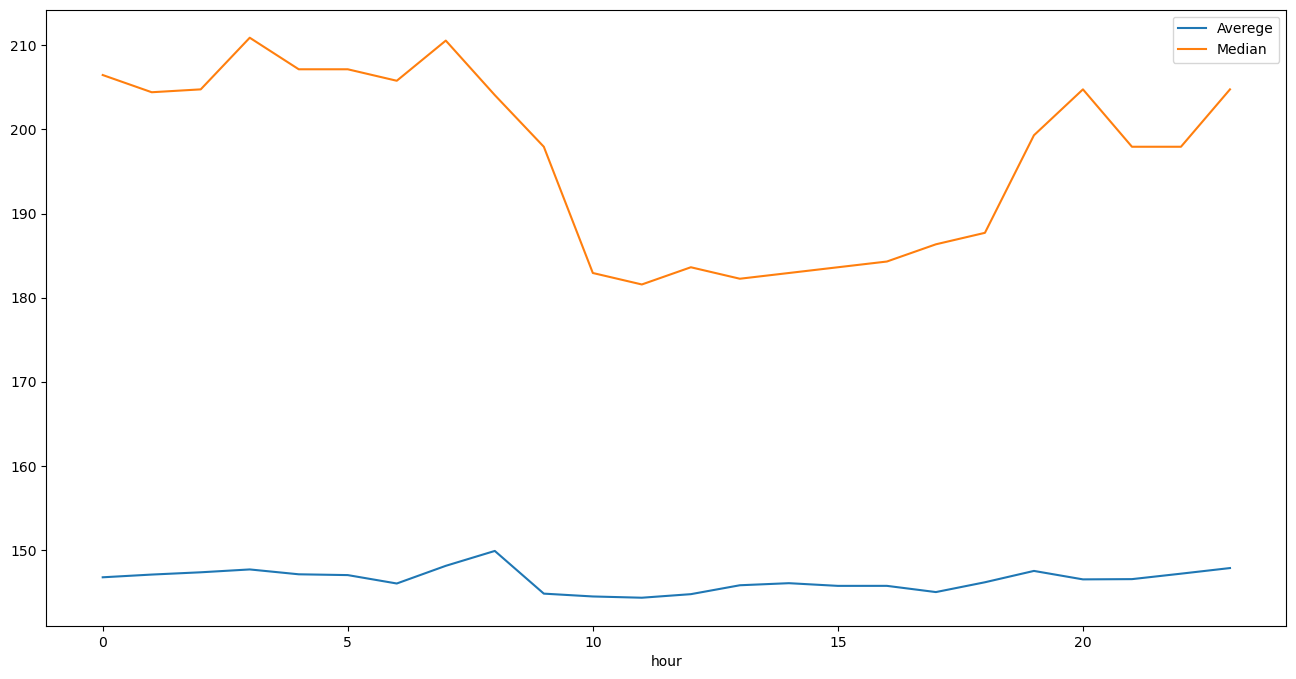

In [34]:
energy_0_hours = energy_0.groupby("hour")
energy_0_averages = pd.DataFrame(
    {"Averege": energy_0_hours.mean()["meter_reading"],
    "Median": energy_0_hours.median()["meter_reading"]}
)

energy_0_averages.plot()
plt.show()

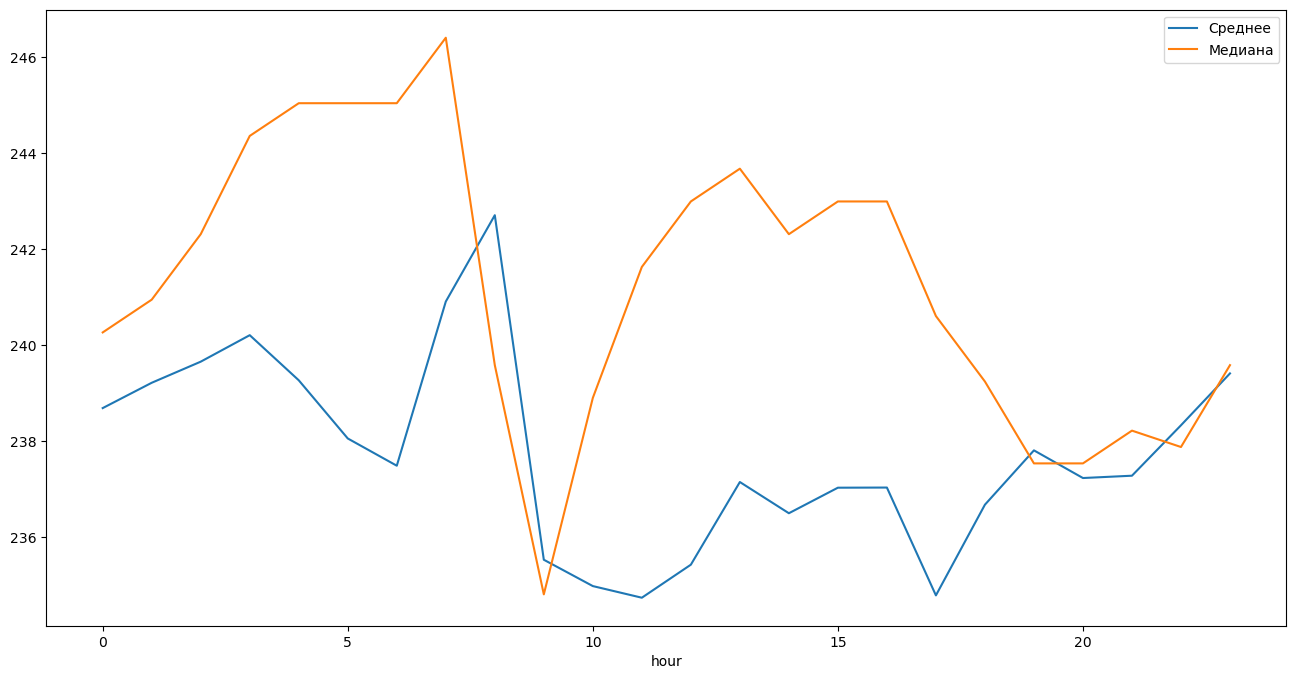

In [60]:
energy_0_hours_filtered = energy_0[energy_0["meter_reading"]>0].groupby("hour")
energy_0_averages_filtered = pd.DataFrame(
    {"Среднее": energy_0_hours_filtered.mean()["meter_reading"],
     "Медиана": energy_0_hours_filtered.median()["meter_reading"]})
energy_0_averages_filtered.plot()
plt.show()

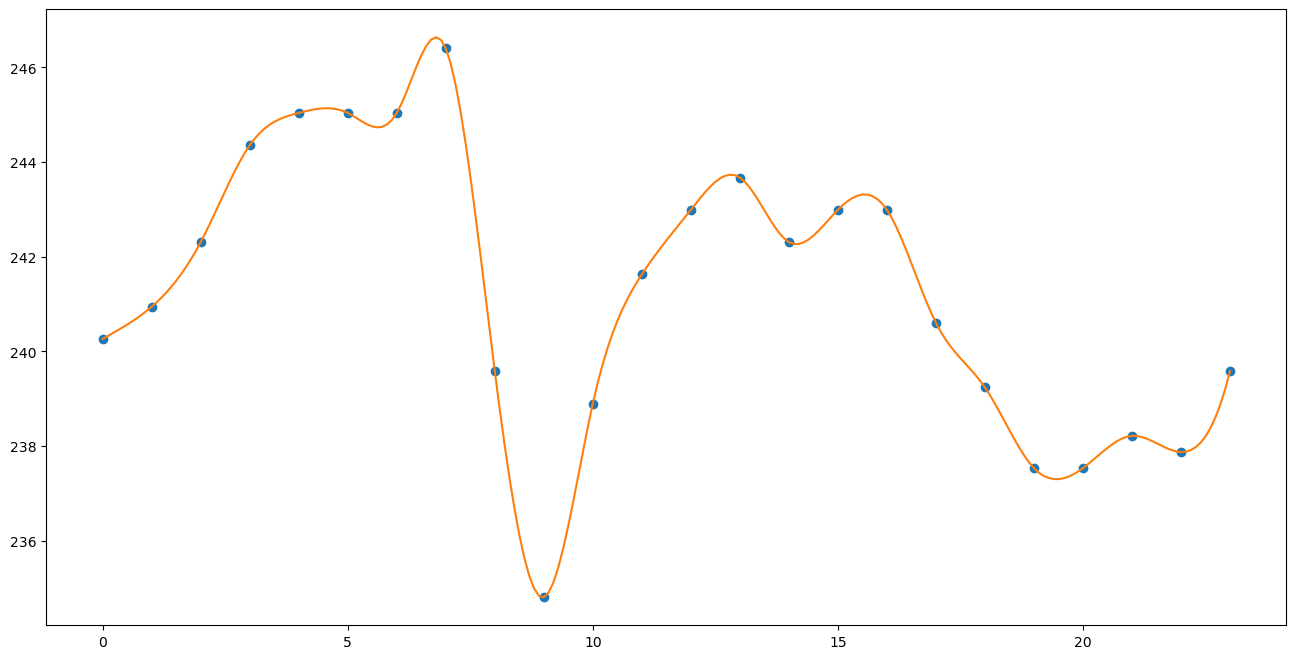

In [61]:
x = np.arange(0, 24)
y = interp1d(x, energy_0_hours_filtered.median()["meter_reading"], kind="cubic")
xn = np.arange(0, 23.1, 0.1)
yn = y(xn)
plt.plot(x, energy_0_hours_filtered.median()["meter_reading"],
         'o', xn, yn, '-')
plt.show()

In [51]:
energy_0_hours.medi()["meter_reading"]

hour
0     206.4745
1     204.4265
2     204.7680
3     210.9110
4     207.1570
5     207.1570
6     205.7920
7     210.5695
8     204.0850
9     197.9420
10    182.9260
11    181.5615
12    183.6090
13    182.2440
14    182.9260
15    183.6090
16    184.2910
17    186.3390
18    187.7040
19    199.3080
20    204.7680
21    197.9420
22    197.9425
23    204.7680
Name: meter_reading, dtype: float64